In [ ]:
# Import pandas for data handling
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from wordcloud import WordCloud, STOPWORDS 


# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/CTP_FINAL/IMDB_Dataset.csv')#, engine='python', encoding='utf-8', error_bad_lines=False
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.duplicated().sum()

418

In [ ]:
df.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
def remove_tags(review):
    #this function will remove the tags of the html 
    clean_review = re.compile('<.*?>')
    return re.sub(clean_review, ' ', review)

In [ ]:
def lower_case(review):
    return review.lower()

In [ ]:
def remove_puntuation(review):
    review = re.sub(r'[^\w\s]', '', review)
    return review

In [ ]:
def remove_stopwords(review):
    words = word_tokenize(review)
    
    valid_words = []
    
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    review = ' '.join(valid_words)
    
    return review

In [ ]:
def stem_words(review):
    porter = PorterStemmer()
    
    words = word_tokenize(review)
    
    valid_words = []
    
    for word in words:
        stemmed_word = porter.stem(word)
        valid_words.append(stemmed_word)
    review = ' '.join(valid_words)
    
    return review

In [ ]:
def pipe_line(review):
    review = remove_tags(review)
    review = lower_case(review)
    review = remove_puntuation(review)
    review = remove_stopwords(review)
    #review = stem_words(review)
    
    return review

In [ ]:
df['clean_data'] = df['review'].apply(pipe_line)
df.head()

,review,sentiment,clean_data
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [ ]:
first_review = df['clean_data'][0]
print(first_review)

one reviewers mentioned watching 1 oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inma

In [ ]:
X = df['clean_data'].values
y = df['sentiment'].values


In [ ]:
# Initialize out vectorizer
vectorizer = TfidfVectorizer()

# Makes the vocabulary matrix
vectorizer.fit(X)

#this transform document into vectors
X = vectorizer.transform(X)
print(X.shape, type(X))


(50000, 167037) <class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# initialize model
model = MultinomialNB(alpha = 0.05)
# fitting model with training data
model.fit(X_train, y_train)
# make new predictions of testing data
y_pred = model.predict(X_test)
# make a predicted probabilities of out testing data
y_pred_prob = model.predict_proba(X_test)
# Evaluate model
accuracy = model.score(X_test, y_test)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8625


In [ ]:
print(classification_report(y_test, y_pred, target_names = model.classes_))

              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4961
    positive       0.87      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

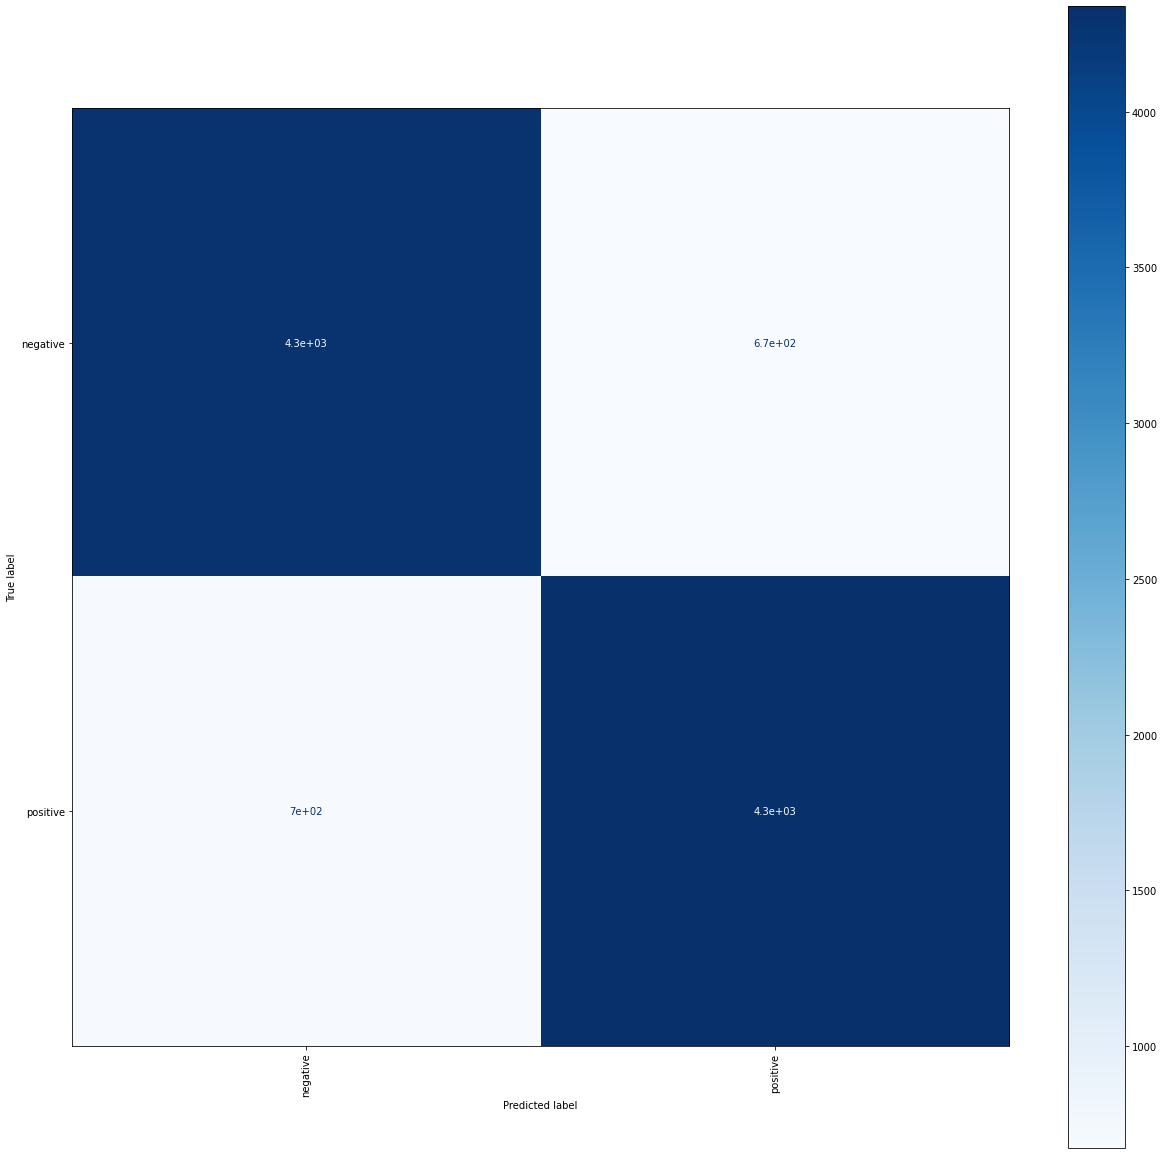

In [ ]:
fig, ax = plt.subplots(figsize = (21, 21))

dis = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, cmap = plt.cm.Blues, ax = ax)
plt.xticks(rotation = 90)


In [ ]:
'''Same Result as the previous model but slower'''

# rf_model = RandomForestClassifier()

# # fit training data to model
# rf_model.fit(X_train, y_train)

# # make prediction of testing data
# y_pred = rf_model.predict(X_test)

# # make predicted probabilities of testing data
# y_pred_proba = rf_model.predict_proba(X_test)

# # evaluate model
# accuracy = rf_model.score(X_test, y_test)
# print(f'Model Accuracy: {accuracy}')
# print(classification_report(y_test, y_pred, target_names = rf_model.classes_))

Model Accuracy: 0.8599
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4961
    positive       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
new_review = 'It was a nice a funny movie'
new_review = pipe_line(new_review)
print(new_review)

new_review_vectorized = vectorizer.transform([new_review])
print(model.predict(new_review_vectorized))

nice funny movie
['positive']


In [ ]:
first_review = df['clean_data'][0]
#print(first_review)

list_words = []
review_list = first_review.split()
counted_words = set(review_list)

for word in counted_words:
  if review_list.count(word) > 2:
    list_words.append(word)
print(list_words)
#for word in df['clean_data'].values:

['violence', 'oz', 'show', 'forget', 'prison']


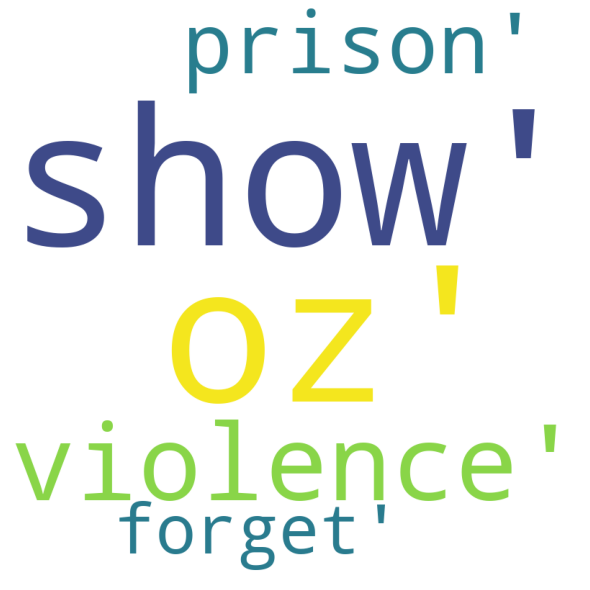

In [ ]:
stopwords = set(STOPWORDS) 
review_str = str(list_words)
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(review_str) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 